In [129]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from statsmodels.graphics.regressionplots import influence_plot
import scipy
from scipy import stats 


In [130]:
data=pd.read_csv("ToyotaCorolla.csv",encoding_errors='ignore')

In [131]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [133]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961,0.409471,0.895543,3.815460,0.81337,0.970752,0.722841,0.508357,0.056407,0.294568,0.218663,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,0.0,0.188510,41.128611,52.64112,0.491907,0.305959,3.011025,0.38975,0.168559,0.447751,0.500104,0.230786,0.456007,0.413483,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000,0.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000,1.000000,1.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
data2=data.drop(data.columns[[0,1,4,5,7,9,10,11,14,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]],axis=1)
data2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [135]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961,0.409471,0.895543,3.815460,0.81337,0.970752,0.722841,0.508357,0.056407,0.294568,0.218663,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,0.0,0.188510,41.128611,52.64112,0.491907,0.305959,3.011025,0.38975,0.168559,0.447751,0.500104,0.230786,0.456007,0.413483,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000,0.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000,1.000000,1.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
corr=data2.corr()
corr

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

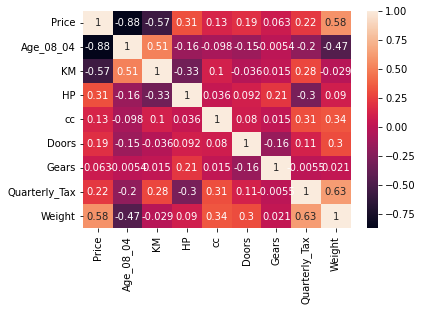

In [137]:
sns.heatmap(corr, annot=True)

In [138]:
data3=data2.rename({'Age_08_04':'Age','Quarterly_Tax':'Tax','cc':'CC'},axis=1)
data3.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Tax', 'Weight'], dtype='object')

In [139]:
data3[data3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [140]:
data4=data3.drop(data3.index[113],axis=0).reset_index(drop=True)

In [141]:
data4.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [142]:
data4[data4.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight


In [143]:
data4.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
Tax       0
Weight    0
dtype: int64

In [144]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   CC      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   Tax     1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [145]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961,0.409471,0.895543,3.815460,0.81337,0.970752,0.722841,0.508357,0.056407,0.294568,0.218663,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,0.0,0.188510,41.128611,52.64112,0.491907,0.305959,3.011025,0.38975,0.168559,0.447751,0.500104,0.230786,0.456007,0.413483,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000,0.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000,1.000000,1.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
data4.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:>

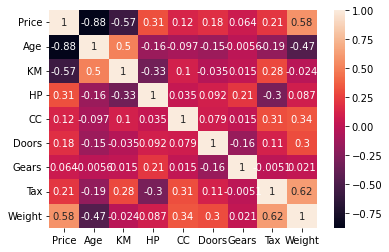

In [147]:
sns.heatmap(data4.corr(), annot=True)

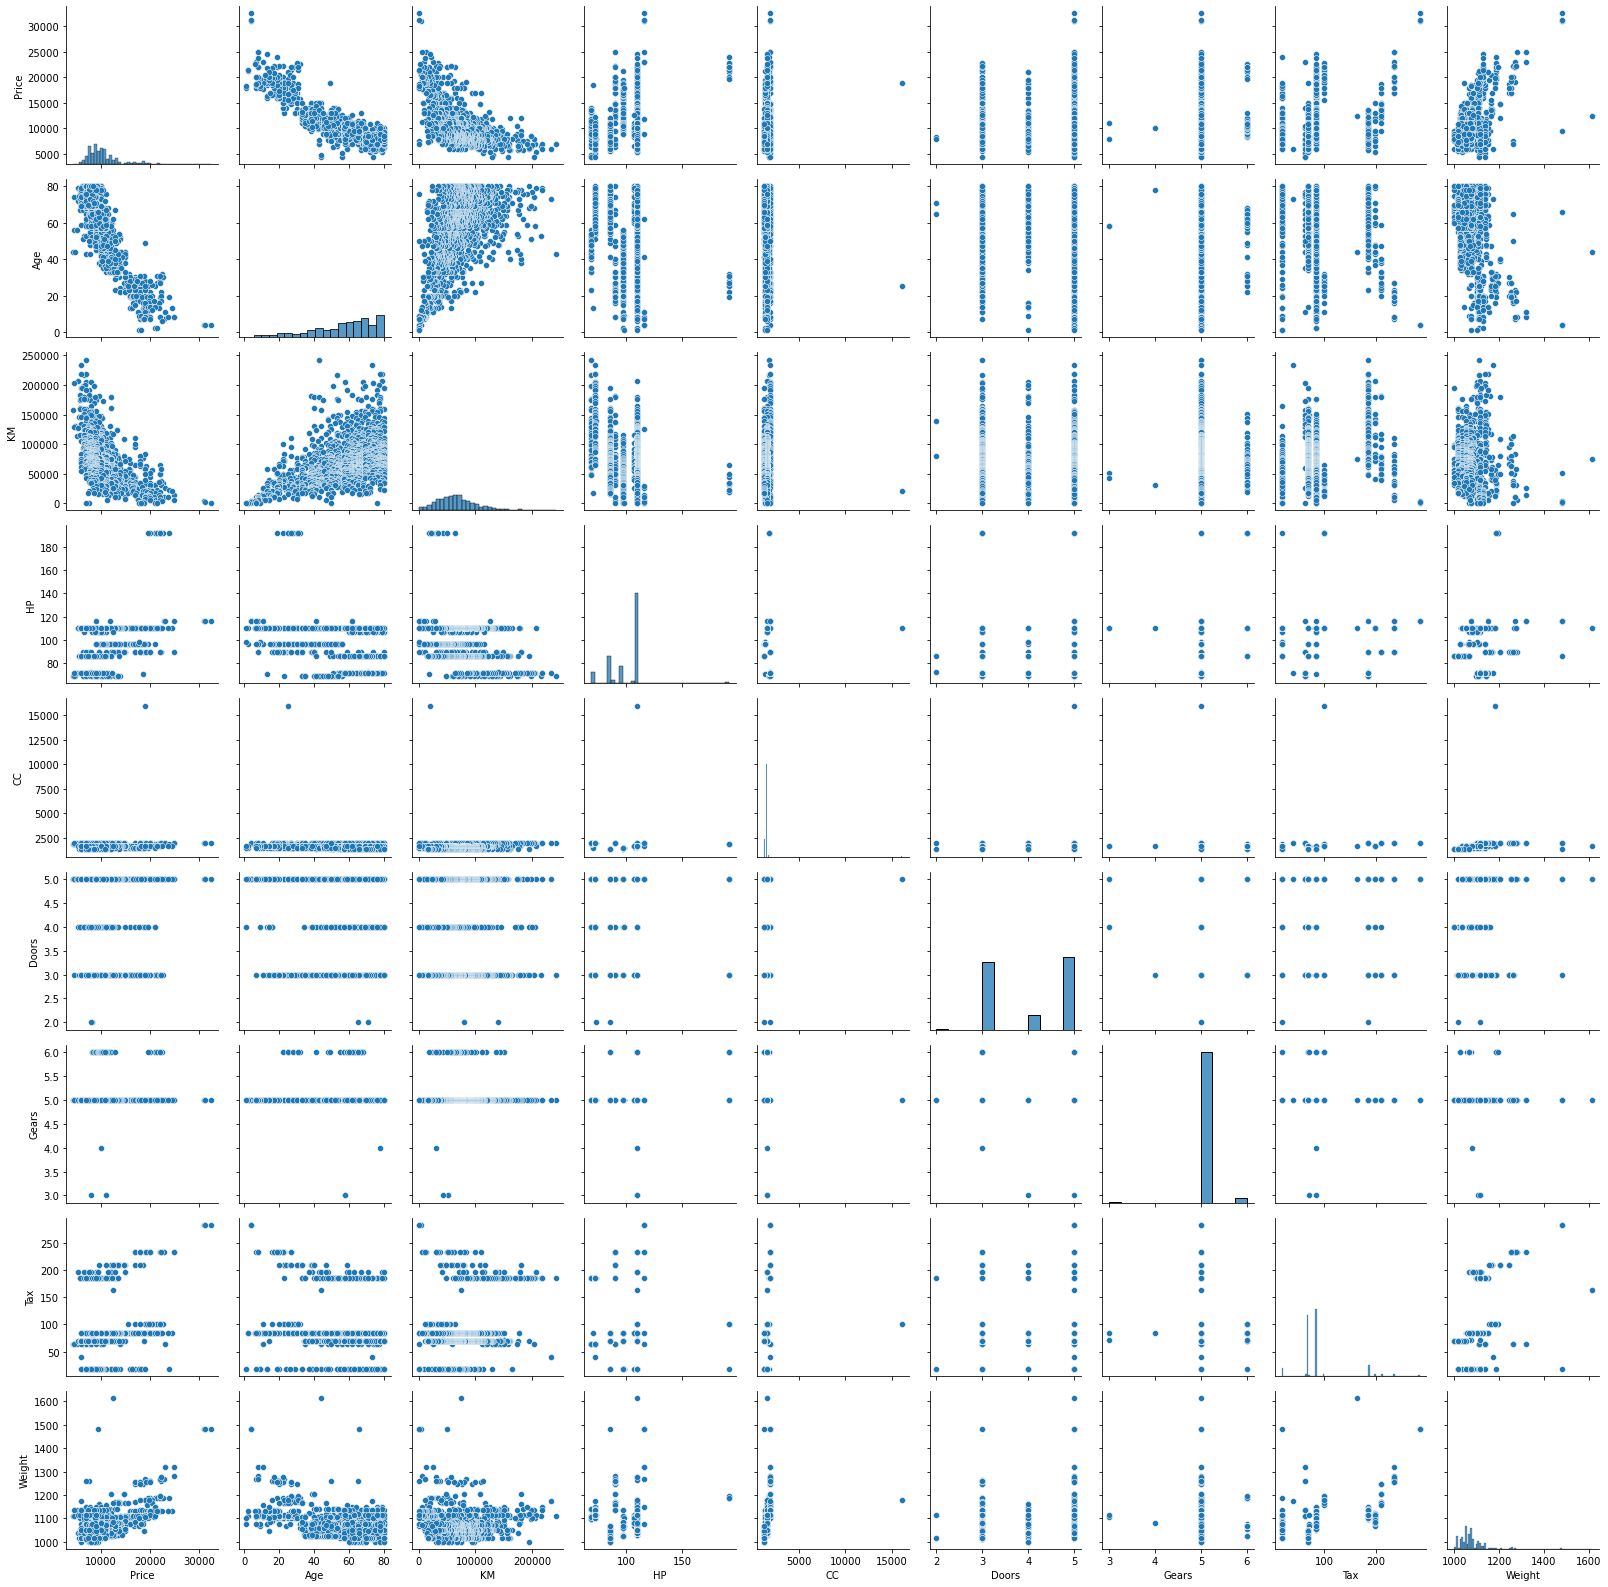

In [148]:
g = sns.PairGrid(data4)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [149]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight',data=data4).fit()

In [150]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:58:52   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
Tax             3.858805
Weight         16.855470
dtype: float64

In [152]:
model.tvalues,'\n',model.pvalues

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 Tax           2.944198
 Weight       15.760663
 dtype: float64,
 '\n',
 Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 CC            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 Tax           3.290363e-03
 Weight        1.031118e-51
 dtype: float64)

In [153]:
model.rsquared,model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [154]:
c=smf.ols("Price~CC",data=data4).fit()
c.tvalues,'\n',c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 '\n',
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [155]:
d=smf.ols("Price~Doors",data=data4).fit()
d.tvalues,'\n',d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 '\n',
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [156]:
cd=smf.ols("Price~CC+Doors",data=data4).fit()
cd.tvalues,'\n',cd.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 '\n',
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [157]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+Tax+Weight',data=data4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+Tax+Weight',data=data4).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+Tax+Weight',data=data4).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+Tax+Weight',data=data4).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+Tax+Weight',data=data4).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+Tax+Weight',data=data4).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_Tax=smf.ols('Tax~Age+KM+HP+CC+Doors+Gears+Weight',data=data4).fit().rsquared
vif_Tax=1/(1-rsq_Tax)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+Tax',data=data4).fit().rsquared
vif_WT=1/(1-rsq_WT)

vif={'Variable':['Age','KM','HP','CC','DR','GR','Tax','WT'],'VIF':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_Tax,vif_WT]}
q=pd.DataFrame(vif)

In [158]:
q

,Variable,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,DR,1.155890
5,GR,1.098843
6,Tax,2.295375
7,WT,2.487180


<function matplotlib.pyplot.show(close=None, block=None)>

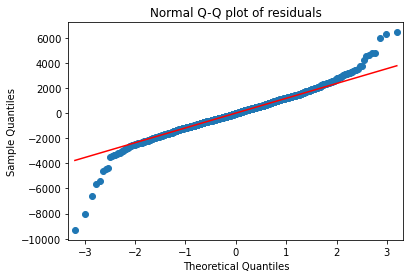

In [159]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show

In [160]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [161]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

In [162]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

In [163]:
model.fittedvalues

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1430     8794.255037
1431     8292.577342
1432     8455.434402
1433     8579.222041
1434    10396.087526
Length: 1435, dtype: float64

In [164]:
model.resid

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1430   -1294.255037
1431    2552.422658
1432      44.565598
1433   -1329.222041
1434   -3446.087526
Length: 1435, dtype: float64

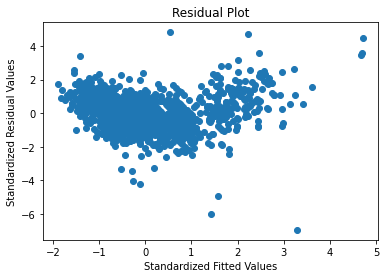

In [165]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

eval_env: 1


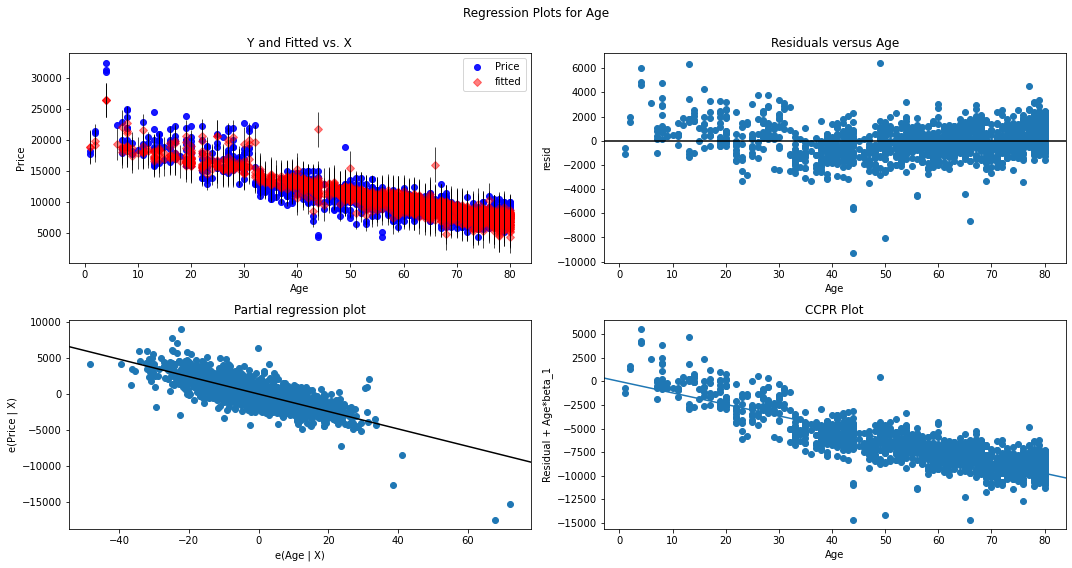

In [166]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

eval_env: 1


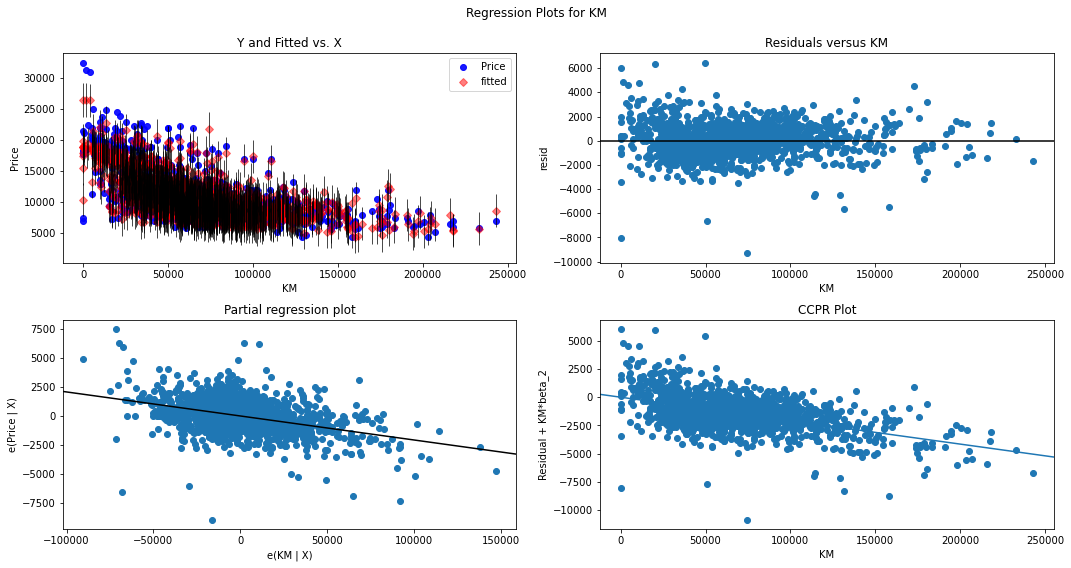

In [167]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

eval_env: 1


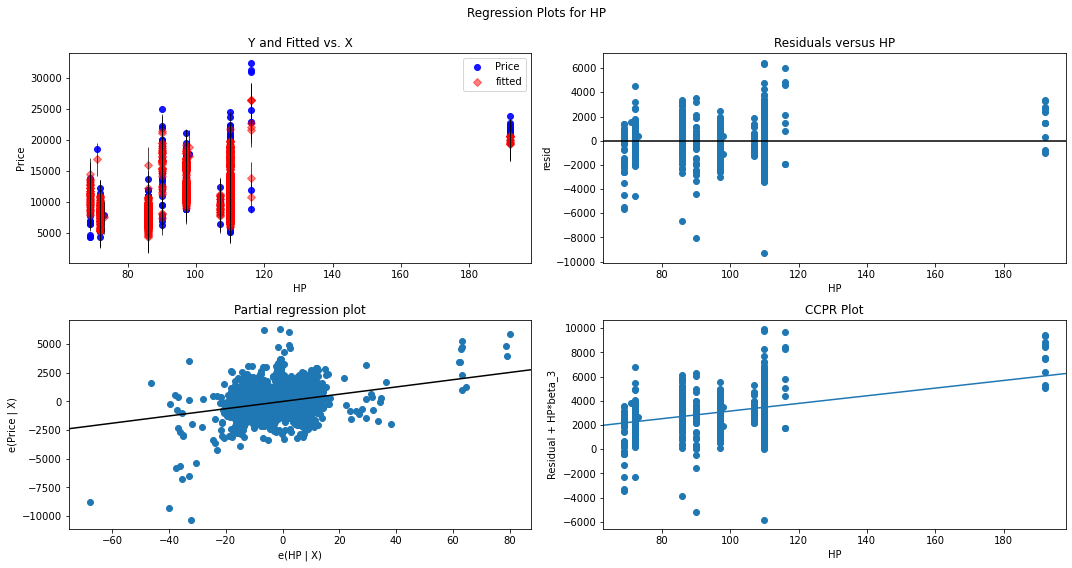

In [168]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

eval_env: 1


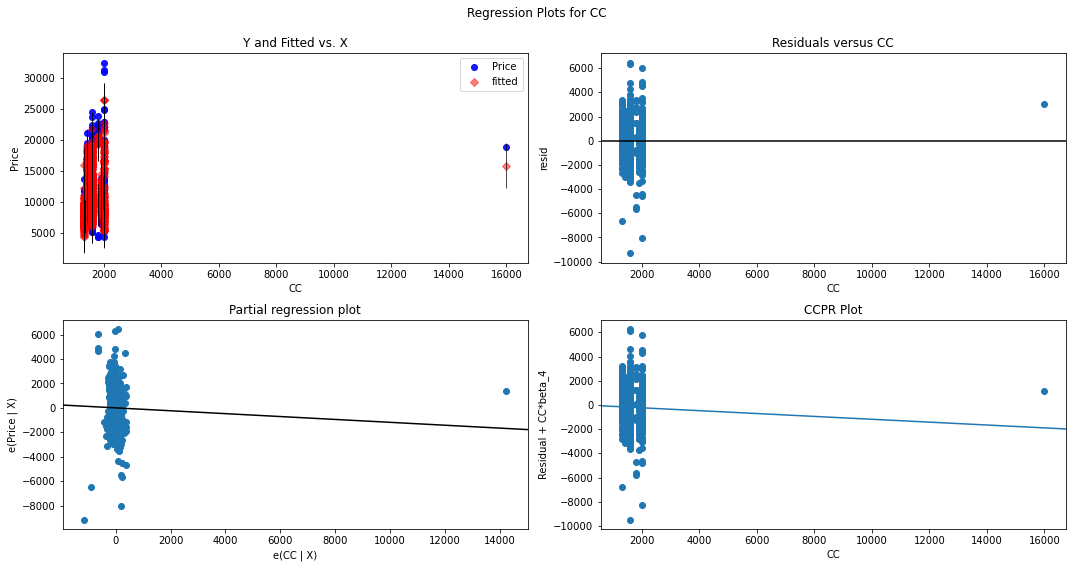

In [169]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"CC",fig=fig)
plt.show()

eval_env: 1


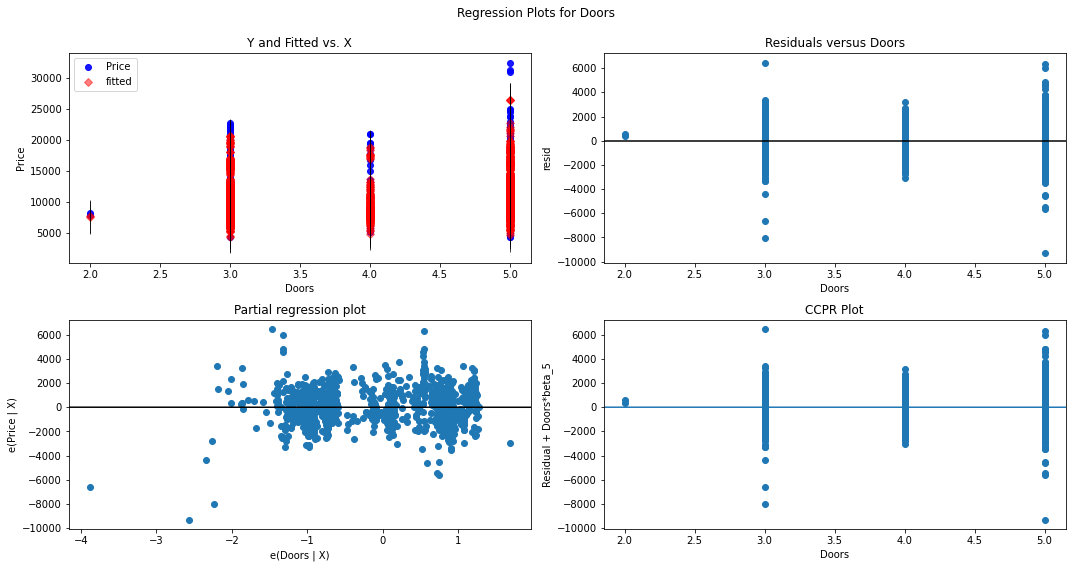

In [170]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

eval_env: 1


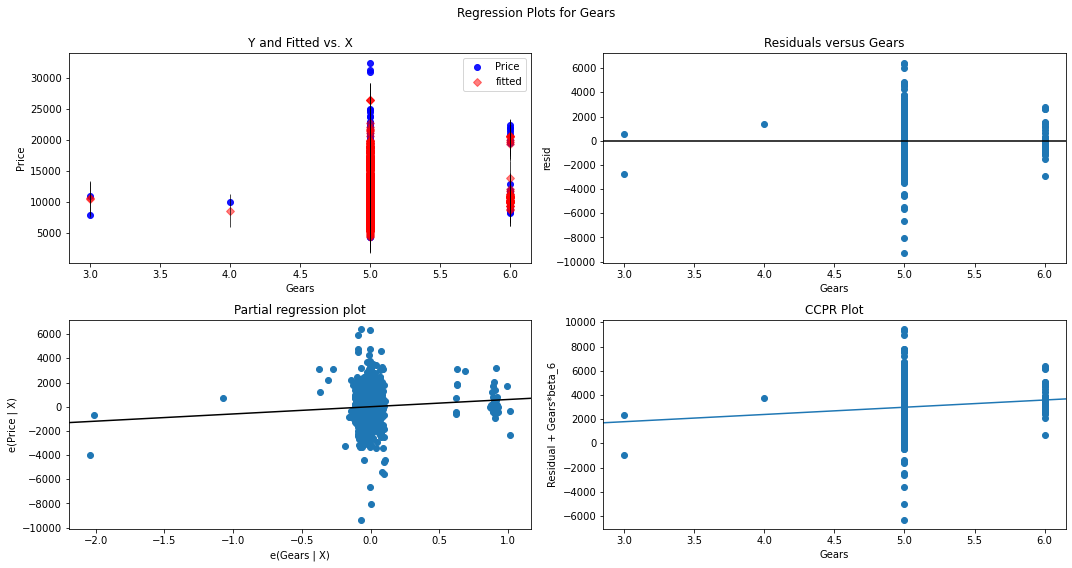

In [171]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

eval_env: 1


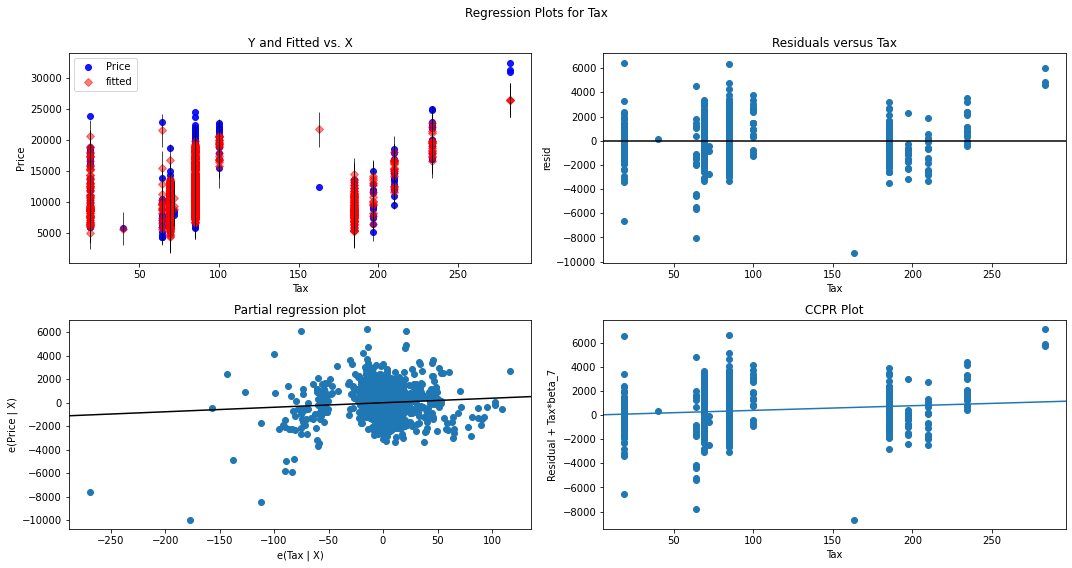

In [172]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Tax",fig=fig)
plt.show()

eval_env: 1


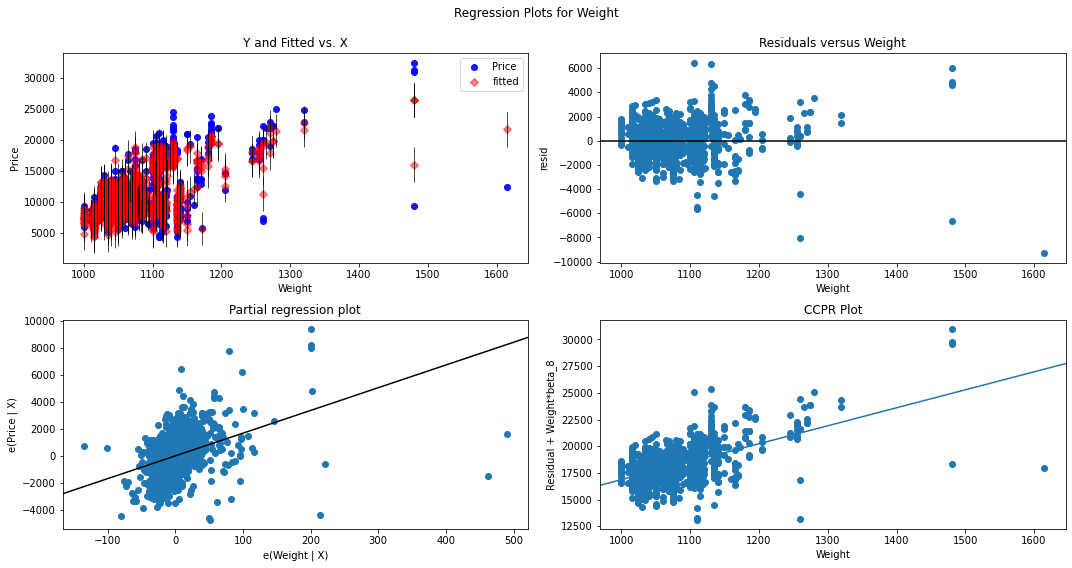

In [173]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

In [174]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

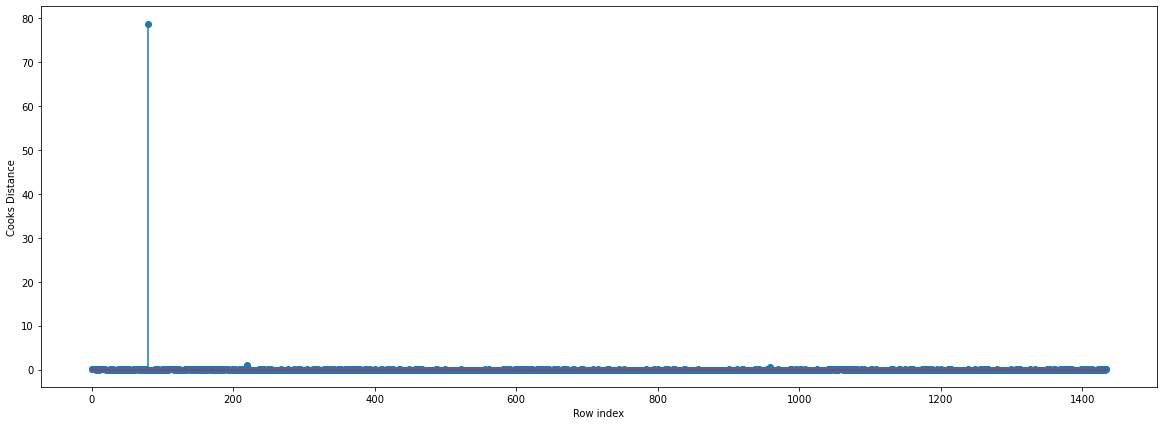

In [175]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [176]:
(np.argmax(c),np.max(c))

(80, 78.72950582248227)

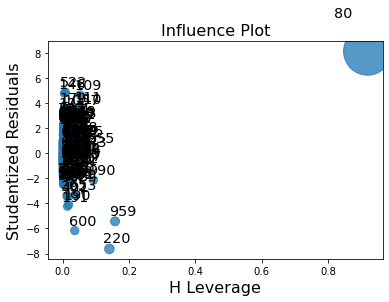

In [177]:
influence_plot(model)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [178]:
k = data4.shape[1]
n = data4.shape[0]
lev= 3*((k + 1)/n)
lev

0.020905923344947737

In [179]:
data4[data4.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [181]:
data_new=data4.copy()
data_new.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [182]:
data4.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [187]:
data5=data_new.drop(data_new.index[[80]],axis=0).reset_index(drop=True)
data5.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [185]:
data5[data5.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
80,17250,29,20000,110,1600,5,5,85,1115


In [188]:
model1=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight',data=data5).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:20:39   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
CC            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
Tax            8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
model_influence1 = model1.get_influence()
(v, _) = model_influence1.cooks_distance
v

array([6.74590070e-03, 3.61405392e-03, 4.90156911e-03, ...,
       3.65590981e-06, 9.10404094e-04, 9.70018332e-03])

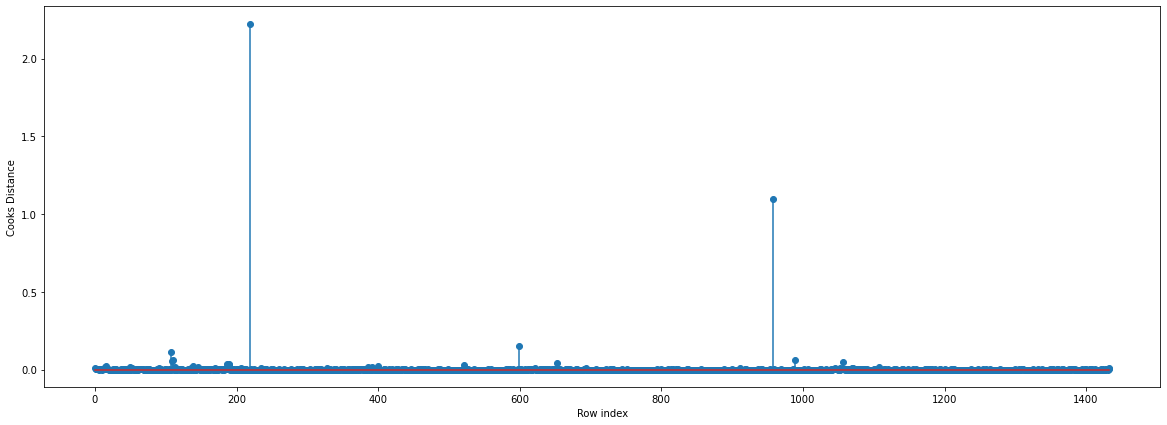

In [190]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.round(v, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [191]:
np.argmax(v),np.max(v)

(219, 2.225351365526337)

In [192]:
data_new1=data5.copy()
data_new1.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [193]:
data5[data5.index.isin([219])]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
219,12450,44,74172,110,1600,5,5,163,1615


In [194]:
data6=data_new1.drop(data_new1.index[[219]],axis=0).reset_index(drop=True)
data6.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [195]:
data6[data6.index.isin([219])]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
219,11950,40,73042,110,1598,5,5,85,1075


In [196]:
model2=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight',data=data6).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1264.
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:25:33   Log-Likelihood:                -12270.
No. Observations:                1433   AIC:                         2.456e+04
Df Residuals:                    1424   BIC:                         2.461e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.018e+04   1398.103     -7.279      0.000   -1.29e+04   -7433.579
Age         -116.6301      2.509    -46.483      0.000    -121.552    -111.708
KM            -0.0172      0.001    -13.935      0.000      -0.020      -0.015
HP            39.2081      2.818     13.916      0.000      33.681      44.735
CC            -3.1922      0.305    -10.455      0.000      -3.791      -2.593
Doors        -64.7218     38.159     -1.696      0.090    -139.577      10.133
Gears        487.4310    186.626      2.612      0.009     121.340     853.522
Tax            7.8987      1.384      5.706      0.000       5.183      10.614
Weight        24.9584      1.189     20.983      0.000      22.625      27.292
==============================================================================
Omnibus:                      195.629   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.249
Skew:                          -0.308   Prob(JB):                         0.00
Kurtosis:                       8.357   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
model_influence2 = model2.get_influence()
(C, _) = model_influence2.cooks_distance
C

array([6.93624492e-03, 3.71406676e-03, 5.00484600e-03, ...,
       3.96836748e-06, 9.68186346e-04, 1.26195368e-02])

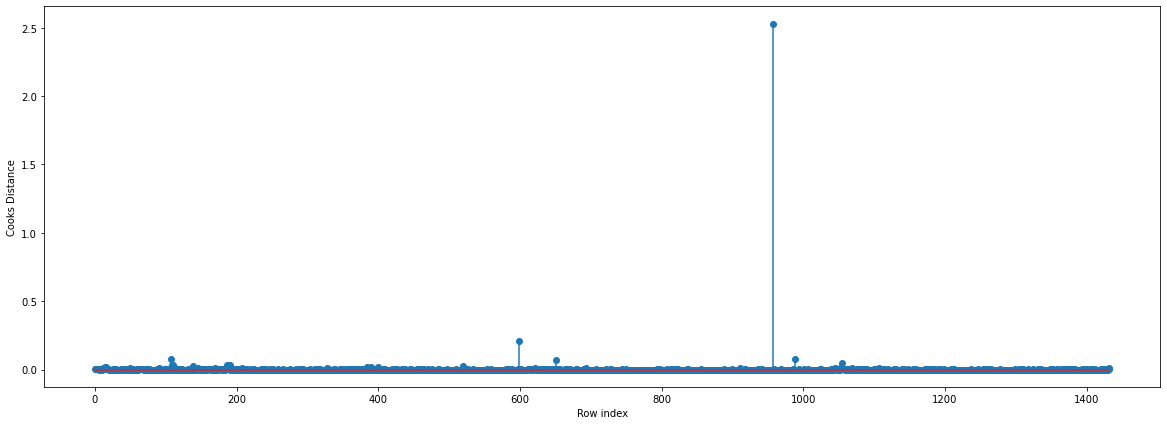

In [198]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.round(C, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [199]:
np.argmax(C),np.max(C)

(957, 2.530779623278018)

In [200]:
new_data2=data6.copy()
new_data2.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [201]:
data6[data6.index.isin([957])]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
957,9390,66,50806,86,1300,3,5,19,1480


In [202]:
data7=new_data2.drop(new_data2.index[[957]],axis=0).reset_index(drop=True)
data7.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [203]:
model3=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight',data=data7).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1355.
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:31:28   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.468e+04   1436.358    -10.222      0.000   -1.75e+04   -1.19e+04
Age         -112.0629      2.481    -45.176      0.000    -116.929    -107.197
KM            -0.0170      0.001    -14.135      0.000      -0.019      -0.015
HP            36.5587      2.747     13.308      0.000      31.170      41.947
CC            -3.7852      0.303    -12.508      0.000      -4.379      -3.192
Doors       -121.9808     37.498     -3.253      0.001    -195.539     -48.423
Gears        466.6014    181.031      2.577      0.010     111.485     821.718
Tax            5.1754      1.373      3.770      0.000       2.482       7.869
Weight        30.5667      1.295     23.595      0.000      28.025      33.108
==============================================================================
Omnibus:                      121.369   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.907
Skew:                          -0.078   Prob(JB):                    6.31e-153
Kurtosis:                       6.424   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
model_influence3 = model3.get_influence()
(V, _) = model_influence3.cooks_distance
V

array([6.82389815e-03, 3.57552355e-03, 4.84841789e-03, ...,
       1.03806619e-05, 1.10039755e-03, 1.82165409e-02])

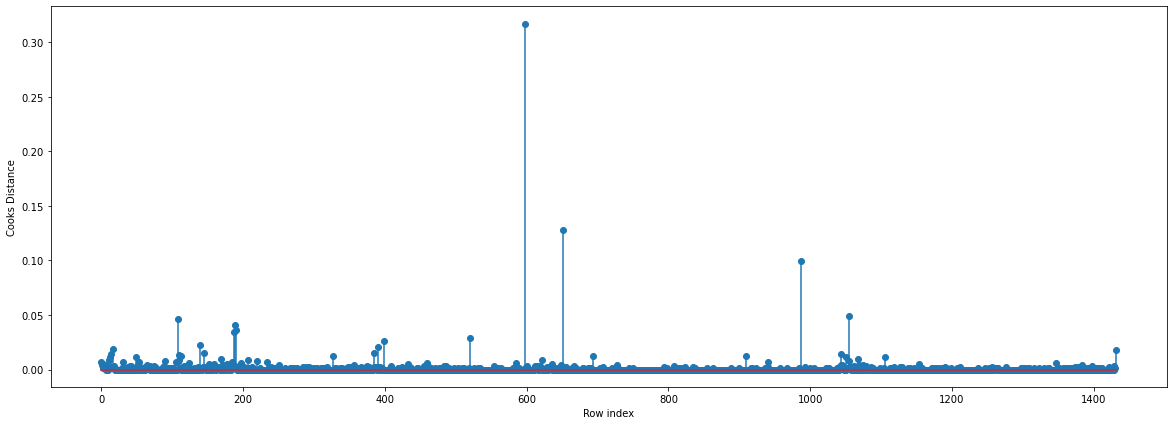

In [205]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.round(V, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [206]:
np.argmax(V),np.max(V)

(598, 0.3168903540144689)

In [207]:
new_data3=data7.copy()
new_data3.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [208]:
data8=new_data3.drop(new_data3.index[[598]],axis=0).reset_index(drop=True)
data8

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


In [209]:
model4=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight',data=data8).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1413.
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:34:50   Log-Likelihood:                -12182.
No. Observations:                1431   AIC:                         2.438e+04
Df Residuals:                    1422   BIC:                         2.443e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.613e+04   1423.155    -11.333      0.000   -1.89e+04   -1.33e+04
Age         -110.3700      2.445    -45.135      0.000    -115.167    -105.573
KM            -0.0177      0.001    -14.951      0.000      -0.020      -0.015
HP            34.2632      2.714     12.625      0.000      28.940      39.587
CC            -3.6790      0.297    -12.372      0.000      -4.262      -3.096
Doors       -143.5437     36.919     -3.888      0.000    -215.965     -71.122
Gears        469.5788    177.682      2.643      0.008     121.033     818.125
Tax            3.6472      1.363      2.676      0.008       0.973       6.321
Weight        32.1321      1.289     24.931      0.000      29.604      34.660
==============================================================================
Omnibus:                       75.132   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.049
Skew:                           0.122   Prob(JB):                     6.82e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
model_influence4 = model4.get_influence()
(c1, _) = model_influence4.cooks_distance
c1

array([7.18056939e-03, 3.71306271e-03, 5.13993637e-03, ...,
       1.69549130e-05, 1.19873452e-03, 2.20210592e-02])

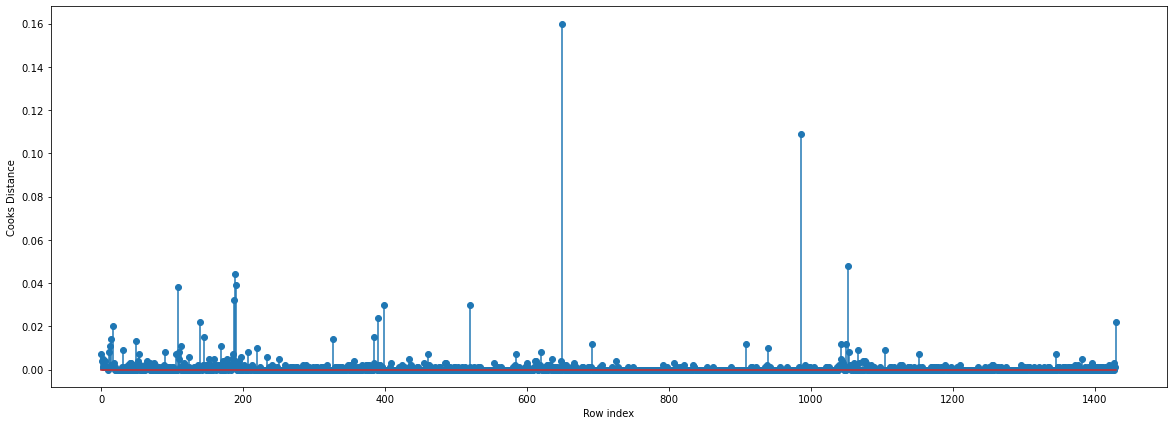

In [211]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [212]:
np.argmax(c1),np.max(c1)

(650, 0.1602806968602901)

In [213]:
model4.rsquared

0.8882395145171202

In [219]:
new_data=pd.DataFrame({'Age':20,"KM":36000,"HP":120,"CC":2000,"Doors":5,"Gears":5,"Tax":77,"Weight":1200},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,20,36000,120,2000,5,5,77,1200


In [220]:
model4.predict(new_data)

0    18251.016767
dtype: float64

In [221]:
final_value=model4.predict(data8)
final_value

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64